<div id="container" style="position:relative;">
<div style="float:left"><h1> Statistics & Public Health 1: Cleaning and EDA </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

    by Mehrnoosh Behzadi
    on Jun 4th-2023

The dataset provided contains mosquito tracking data from the city of Chicago, Illinois, spanning from 2007 to 2019. The purpose of this project is to perform exploratory data analysis (EDA) and data wrangling to gain insights into the dataset.

**Part 1 - Basic Data Wrangling**

In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the mosquito data from the CSV file using pandas
mosquito_data = pd.read_csv("mosquito_data.csv", sep=",")

# Display the first few rows of the dataset
mosquito_data.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


Dataset Overview:

The dataset consists of 13 columns, including: 
- Year: The year the WNV test was performed.
- Week: The week the WNV test was performed.
- Address Block: The address of the location of the trap.
- Block: The block number of the address.
- Trap: The ID of the trap.
- Trap type: The type of trap.
- Date: The date and time of the WNV test.
- Mosquito number: The number of mosquitoes caught in the trap.
- Mosquito ID: The ID for the mosquito species.
- WNV Present: Indicates whether West Nile Virus (WNV) was present in the mosquitoes.
- Species: The mosquito species.
- Lat: The latitude of the trap location.
- Lon: The longitude of the trap location.

In [3]:
# Q1.1: The shape of the dataframe
mosquito_data.shape

(18495, 13)

In [4]:
mosquito_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


Note: 
- The dataset contains a total of 18,495 entries.
- There are 2924 missing values in the 'Lat' and 'Lon' columns.
- The Address Block column contains "XX" between the block and street number.
- Certain columns, i.e. 'Date' and 'WNV Present', could be optimized in terms of their data types.

In [5]:
# Q1.2: Convert the type of Date column from string a datetime format
mosquito_data['Date'] = pd.to_datetime(mosquito_data['Date'])

print(mosquito_data['Date'].dtype)

datetime64[ns]


In [6]:
# Q1.3: Two numeric columns'Mosquito number' and 'Year', and two categorical columns 'Trap type' and 'Species'.
numeric_columns = ['Mosquito number', 'Year']
categorical_columns = ['Trap type', 'Species']

# Descriptive statistics for numeric columns
print(mosquito_data[numeric_columns].describe())

       Mosquito number          Year
count     18495.000000  18495.000000
mean         10.879913   2012.905812
std          13.475066      3.725857
min           1.000000   2007.000000
25%           2.000000   2010.000000
50%           5.000000   2013.000000
75%          14.000000   2016.000000
max          50.000000   2019.000000


To gain insights into the dataset, we examined two numeric columns, 'Mosquito number' and 'Year', as well as two categorical columns, 'Trap type' and 'Species'. The descriptive statistics reveal the following:

- The mean number of mosquitoes caught is approximately 10.88, with a standard deviation of 13.48.
- The distribution of mosquito numbers is positively skewed, as the median (5.00) is smaller than the mean.
- The years in the dataset range from 2007 to 2019, with a mean of 2012.91 and a standard deviation of 3.73.
- The distribution of 'Year' appears to be relatively uniform, without any distinct skewness.

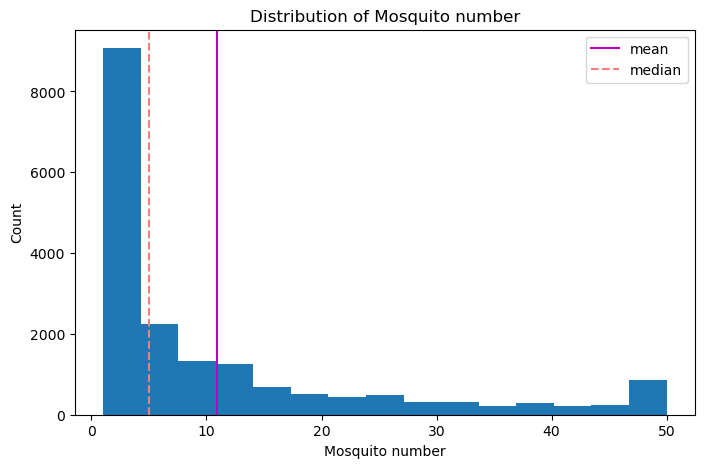

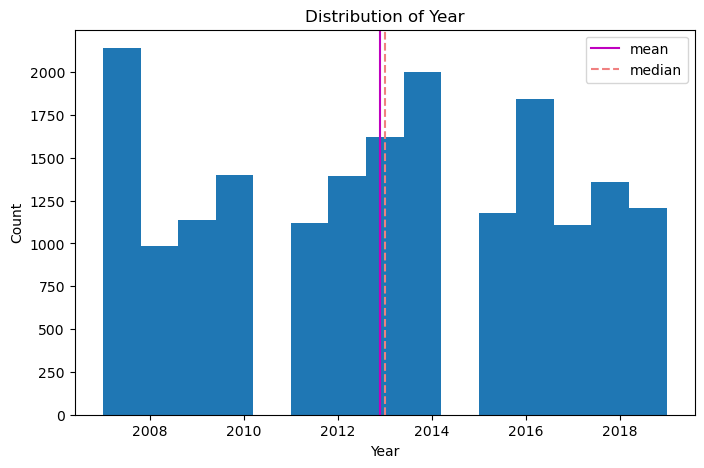

In [8]:
# Distribution of numeric columns
    
plt.figure(figsize=(8, 5))
plt.hist(mosquito_data['Mosquito number'], bins=15)
plt.axvline(mosquito_data['Mosquito number'].mean(), color="m", label="mean")
plt.axvline(mosquito_data['Mosquito number'].median(), color="lightcoral", linestyle="--", label="median")
plt.xlabel('Mosquito number')
plt.ylabel('Count')
plt.title('Distribution of Mosquito number')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
#mosquito_data['Year'].value_counts().sort_index().plot(kind='bar')
plt.hist(mosquito_data['Year'], bins=15)
plt.axvline(mosquito_data['Year'].mean(), color="m", label="mean")
plt.axvline(mosquito_data['Year'].median(), color="lightcoral", linestyle="--", label="median")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.legend()
plt.show()

To provide a visual representation of the distributions, histograms were plotted for both numeric columns. The histograms reveal the following:

- The distribution of 'Mosquito number' is positively skewed, with a peak around lower values. The mean (represented by the vertical magenta line) is slightly higher than the median (represented by the dashed lightcoral line), indicating the skewness.
- The distribution of 'Year' appears to be relatively uniform, without any distinct skewness. The mean and median are close to each other, indicating a balanced distribution across the years.

In [9]:
# Value counts for categorical columns
for column in categorical_columns:
    print(mosquito_data[column].value_counts())

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64
Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64


In addition to the numeric columns, we also examined two categorical columns, 'Trap type' and 'Species', to gain further insights into the dataset.

Categorical Columns:
- The majority of traps (17,741) are of type GRAVID, indicating that this type is most commonly used for mosquito surveillance. The CDC and SENTINEL trap types are also present but in smaller frequencies. The OVI trap type appears only once in the dataset.
- The CULEX RESTUANS species has the highest count, with 11,866 occurrences in the dataset. It is followed by CULEX PIPIENS with 5,486 occurrences. The CULEX TERRITANS and CULEX SALINARIUS species have relatively lower counts of 917 and 226, respectively.

In [10]:
# Q1.4: Check if any columns contain duplicate information
duplicate_columns = mosquito_data.duplicated()
print(duplicate_columns)

0        False
1        False
2        False
3        False
4        False
         ...  
18490    False
18491    False
18492    False
18493    False
18494     True
Length: 18495, dtype: bool


In [11]:
# Remove the redundant columns
clean_data = mosquito_data.drop_duplicates()
clean_data.shape

(17837, 13)

Additionally, we performed a check for duplicate information in the dataset to ensure data integrity.

We found that there is at least one row that contains duplicate information, as indicated by the True value in the last row of the output. To address this issue and eliminate redundant data, we removed the duplicate rows.

After removing the duplicate rows, the dataframe contains 17,837 rows. This ensures that each row in the dataframe is unique and contributes distinct information to the analysis.

In [12]:
# Q1.5: Check if any columns contain null value
clean_data.isna().sum(axis=0)

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [13]:
# Check what percent of the values are missing here
clean_data.isna().sum(axis=0)/clean_data.shape[0]*100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

Furthermore, we conducted an analysis to identify if any columns in the cleaned dataset contain null values. The results of this analysis revealed that two columns, 'Lat' and 'Lon', have 2,266 missing values. This accounts for approximately 12.70% of the total values in the column.

It is crucial to note that the presence of missing values in the 'Lat' and 'Lon' columns could impact any geographical analysis or visualization that relies on precise location data. Therefore, it is important to consider appropriate strategies to handle or impute these missing values, ensuring the accuracy and reliability of subsequent analyses.

In [13]:
#Install the geopy library if you don't have it
!pip install geopy

In [14]:
# Import the geopy library for converting addresses into geographic coordinates
from geopy.geocoders import Nominatim

# Create an instance of the geocoder 
geolocator = Nominatim(user_agent='my_app')

In [15]:
# Define a function to geocode addresses and return the latitude and longitude
def geocode_address(address):
    try:
        # Geocode the address using the geocoder
        location = geolocator.geocode(address, timeout=10)  # Set a timeout value for faster execution
        if location:
            # Return the latitude and longitude if the geocoding is successful
            return location.latitude, location.longitude
        else:
            # Return NaN values if the geocoding is not successful
            return np.nan, np.nan          
    except:
        # Return NaN values if there is an exception during geocoding
        return np.nan, np.nan

In [16]:
# Filter the dataframe to include only rows with null latitude or longitude
rows_with_null = clean_data[(clean_data['Lat'].isnull()) | (clean_data['Lon'].isnull())]

# Create an empty dictionary to store the geocoded coordinates for unique addresses
address_coordinates = {}

# Loop over the filtered rows and find the coordinates for unique addresses
for index, row in rows_with_null.iterrows():
    address = row['Address Block']
    
    # Remove 'XX' from the address
    address = address.replace('XX', '')
    
    if address not in address_coordinates:
        lat, lon = geocode_address(address)
        address_coordinates[address] = (lat, lon)
    
    # Assign the coordinates to the current row
    clean_data.loc[index, 'Lat'], clean_data.loc[index, 'Lon'] = address_coordinates[address]

# Forward-fill the coordinates for similar addresses
clean_data.loc[:, 'Lat'] = clean_data['Lat'].ffill()
clean_data.loc[:, 'Lon'] = clean_data['Lon'].ffill()

To address the missing values in 'Lat' and 'Lon', we utilized the geopy library to geocode the addresses and retrieve the corresponding latitude and longitude coordinates.

By incorporating geocoding techniques, we were able to fill in missing latitude and longitude values, enhancing the geographical accuracy of the dataset for subsequent analysis and visualization.

In [17]:
clean_data.isna().sum(axis=0)

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                1
Lon                1
dtype: int64

In [18]:
# Replace NaN values with the median values if geocoding is not successful
clean_data.loc[:, 'Lat'] = clean_data['Lat'].fillna(clean_data['Lat'].median())
clean_data.loc[:, 'Lon'] = clean_data['Lon'].fillna(clean_data['Lon'].median())


In [19]:
clean_data.isna().sum(axis=0)

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

After performing geocoding and filling in missing values, we checked for any remaining null values in the dataset. We found that only one row had missing values in both columns.

To handle this, we replaced the NaN values with the respective median values of the 'Lat' and 'Lon' columns. This approach provides a reasonable estimate for the missing coordinates based on the central tendency of the available data.

Following this replacement, we rechecked for null values in the dataset, and we can confirm that there are no remaining missing values in any of the columns. This ensures that the dataset is now complete and ready for further analysis.

**Part 2 - Basic EDA**

In [20]:
#Q2: Relationship between mosquito number and date
# Calculate the number of days since the earliest date in the dataset
clean_data.loc[:, 'Days'] = (clean_data['Date'] - clean_data['Date'].min()).dt.days

# Calculate central tendency
mean = clean_data['Mosquito number'].mean()
median = clean_data['Mosquito number'].median()

# Calculate dispersion
range_val = clean_data['Mosquito number'].max() - clean_data['Mosquito number'].min()
std_dev = clean_data['Mosquito number'].std()

# Calculate covariance and correlation
covariance = clean_data['Mosquito number'].cov(clean_data['Days'])
correlation = clean_data['Mosquito number'].corr(clean_data['Days'])

# Print the calculated statistics
print('Central Tendency:')
print('Mean:', mean)
print('Median:', median)
print('\nDispersion:')
print('Range:', range_val)
print('Standard Deviation:', std_dev)
print('\nCovariance:', covariance)
print('Correlation:', correlation)

Central Tendency:
Mean: 10.4588215507092
Median: 4.0

Dispersion:
Range: 49
Standard Deviation: 13.182842654720885

Covariance: 2122.319451207523
Correlation: 0.11824681121607014


C:\Users\mojta\AppData\Local\Temp\ipykernel_27340\1311212421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'Days'] = (clean_data['Date'] - clean_data['Date'].min()).dt.days


In order to explore the relationship between the number of mosquitoes caught in the trap and the date, we performed the following analysis:

First, we calculated the number of days since the earliest date in the dataset to quantify the temporal aspect of the data.

Next, we computed the central tendency measures. The mean value of the 'Mosquito number' column is approximately 10.46, indicating the average number of mosquitoes caught in a trap. The median value, which is 4.0, represents the middle value of the distribution.

We then examined the dispersion of the 'Mosquito number' values. The range, calculated as the difference between the maximum and minimum values, is 49. The standard deviation is approximately 13.18, reflecting the variability in the number of mosquitoes.

To assess the relationship between mosquito number and date, we calculated the covariance and correlation. The covariance between 'Mosquito number' and 'Days' is 2122.32, indicating a positive association between the two variables. The correlation coefficient is approximately 0.12, suggesting a weak positive correlation.

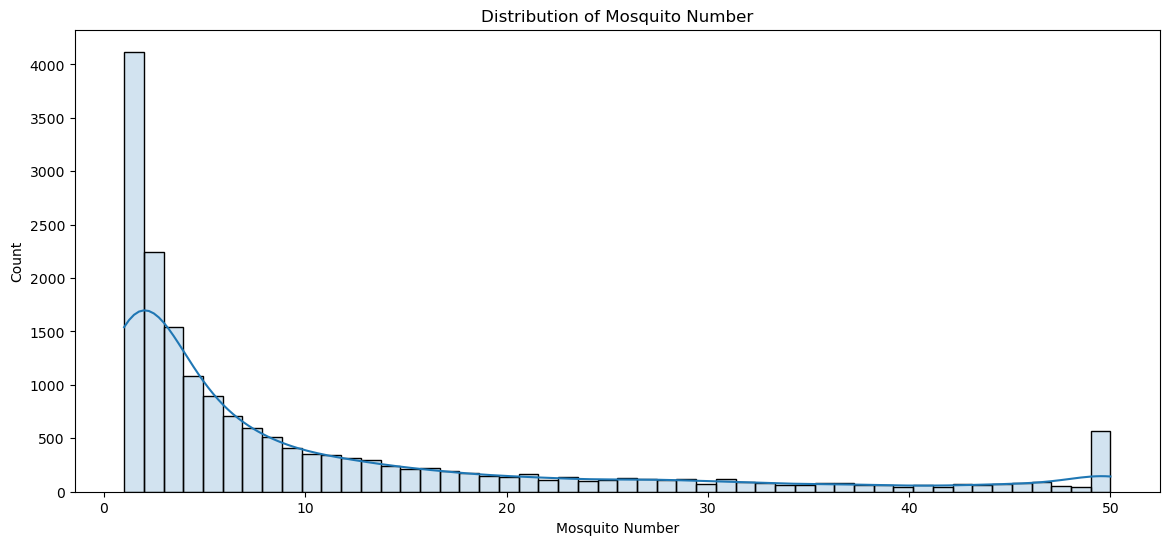

In [21]:
# Q2-1: Explore the relationship between mosquito number and date
plt.figure(figsize=(14, 6))

# Plot histogram of mosquito numbers
sns.histplot(data=clean_data, x='Mosquito number', bins=50, kde=True, alpha=0.2)

# Set the axis labels and title
plt.title('Distribution of Mosquito Number')
plt.xlabel('Mosquito Number')
plt.ylabel('Count')

# Show the plot
plt.show()


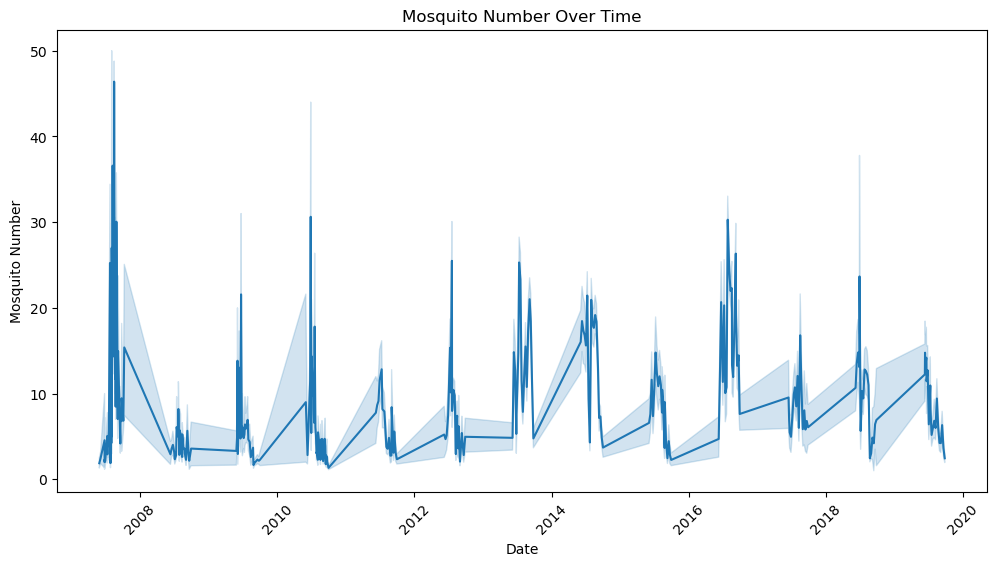

In [22]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot mosquito numbers over time
sns.lineplot(data=clean_data, x='Date', y='Mosquito number')

# Set the axis labels and title
plt.title('Mosquito Number Over Time')
plt.xlabel('Date')
plt.ylabel('Mosquito Number')
plt.xticks(rotation=45)

# Show the plot
plt.show()

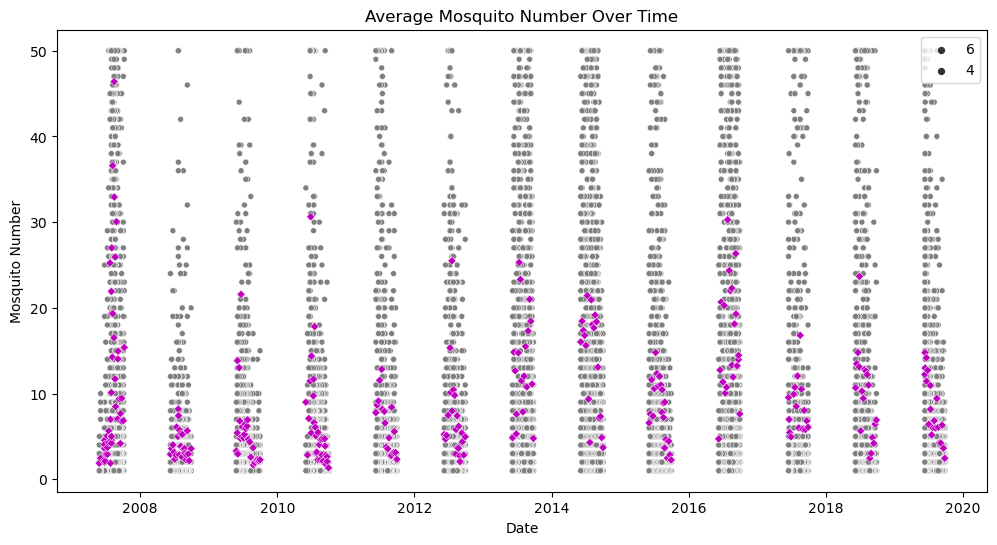

In [23]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Calculate the average mosquito number per date
average_mosquito = clean_data.groupby('Date')['Mosquito number'].mean()
# Reset the index to convert the grouped data into a DataFrame
average_mosquito = average_mosquito.reset_index()

# Create a scatter plot
sns.scatterplot(data=clean_data, x='Date', y='Mosquito number', color='tab:gray', size=6)
sns.scatterplot(data=average_mosquito, x='Date', y='Mosquito number', color='m',  marker='D', size=4)

# Set the axis labels and title
plt.title('Average Mosquito Number Over Time')
plt.xlabel('Date')
plt.ylabel('Mosquito Number')

plt.legend()

# Show the plot
plt.show()

In order to explore the relationship between the number of mosquitoes and the date, we created the following visualizations:

- A histogram to visualize the distribution of mosquito numbers. The histogram shows the frequency of different mosquito number ranges, providing an overview of the distribution of mosquito counts.

- A line graph to observe the trend of mosquito numbers over time. This visualization allows us to identify any patterns or trends in mosquito populations over time.

- A scatter plot to examine the average mosquito number per date. The scatter plot shows individual data points as well as the average mosquito number represented by diamond markers.

**Part 3 - Advanced EDA**

<Figure size 600x600 with 0 Axes>

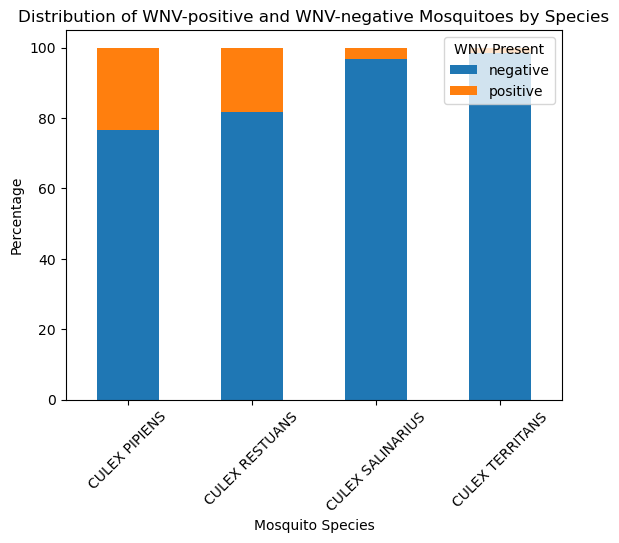

In [24]:
# Q3-1: Relationship between mosquito species and WNV prevalence
# Group the data by mosquito species and WNV status and count the occurrences
species_wnv_counts = clean_data.groupby(['Species', 'WNV Present'])['WNV Present'].count().unstack()

# Calculate the percentage of WNV-positive and WNV-negative mosquitoes for each species
species_wnv_percentages = 100 * species_wnv_counts.div(species_wnv_counts.sum(axis=1), axis=0)

# Set the figure size
plt.figure(figsize=(6, 6))

# Plot the stacked bar chart
species_wnv_percentages.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Distribution of WNV-positive and WNV-negative Mosquitoes by Species')
plt.xlabel('Mosquito Species')
plt.ylabel('Percentage')

# Show the legend
plt.legend(title='WNV Present', loc='upper right')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

To analyze the relationship between mosquito species and the prevalence of West Nile Virus (WNV), we created a stacked bar chart. Each bar represents a mosquito species, and the height of the bar is divided into segments representing the percentage of WNV-positive and WNV-negative mosquitoes within that species.

we can observe that Culex pipiens and Culex restuans have a relatively higher percentage of WNV-positive mosquitoes compared to Culex salinarius and Culex territans. This insight highlights the varying susceptibility of mosquito species to West Nile Virus.

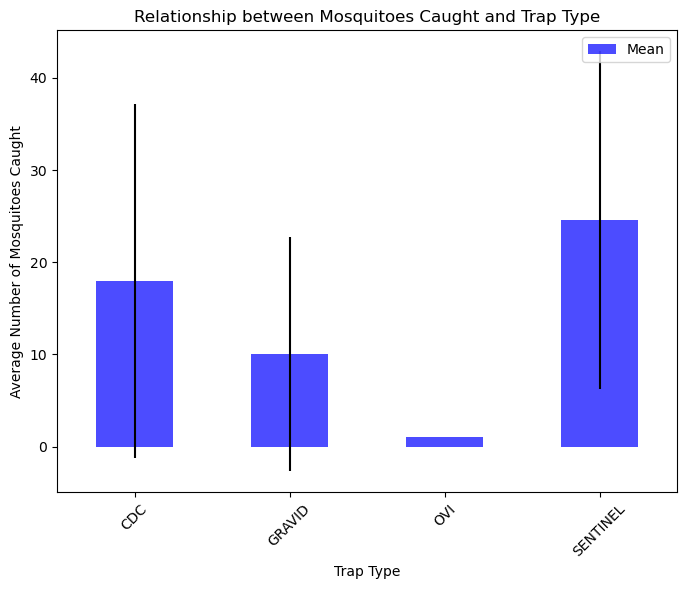

                mean  median        std  min  max
Trap type                                        
CDC        17.984877     7.0  19.183419    1   50
GRAVID     10.054100     4.0  12.708480    1   50
OVI         1.000000     1.0        NaN    1    1
SENTINEL   24.564593    20.0  18.301347    1   50


In [27]:
# Q3-2: Relationship between the number of mosquitos caught and trap type

# Calculate the descriptive statistics for each trap type
statistics = clean_data.groupby('Trap type')['Mosquito number'].agg(['mean', 'median', 'std', 'min', 'max'])

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the grouped bar chart
statistics['mean'].plot(kind='bar', color='blue', alpha=0.7, yerr=statistics['std'])

# Set the title and labels
plt.xlabel('Trap Type')
plt.ylabel('Average Number of Mosquitoes Caught')
plt.title('Relationship between Mosquitoes Caught and Trap Type')

# Show the legend
plt.legend(['Mean'])

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Displaying the descriptive statistics
print(statistics)


To examine the relationship between the number of mosquitoes caught and the trap type, we visualized the average number of mosquitoes caught for each trap type using a grouped bar chart. The height of each bar represents the average number of mosquitoes, while the error bars indicate the variability in the data as represented by the standard deviation.

From the chart, we can observe that the CDC trap type has the highest average number of mosquitoes caught, followed by the Sentinel trap type. The Gravid trap type has a slightly lower average, while the OVI trap type has the lowest average number of mosquitoes caught. These findings suggest that the trap type may influence the number of mosquitoes captured.

Understanding the relationship between the number of mosquitoes caught and trap type is valuable for mosquito surveillance and control efforts.

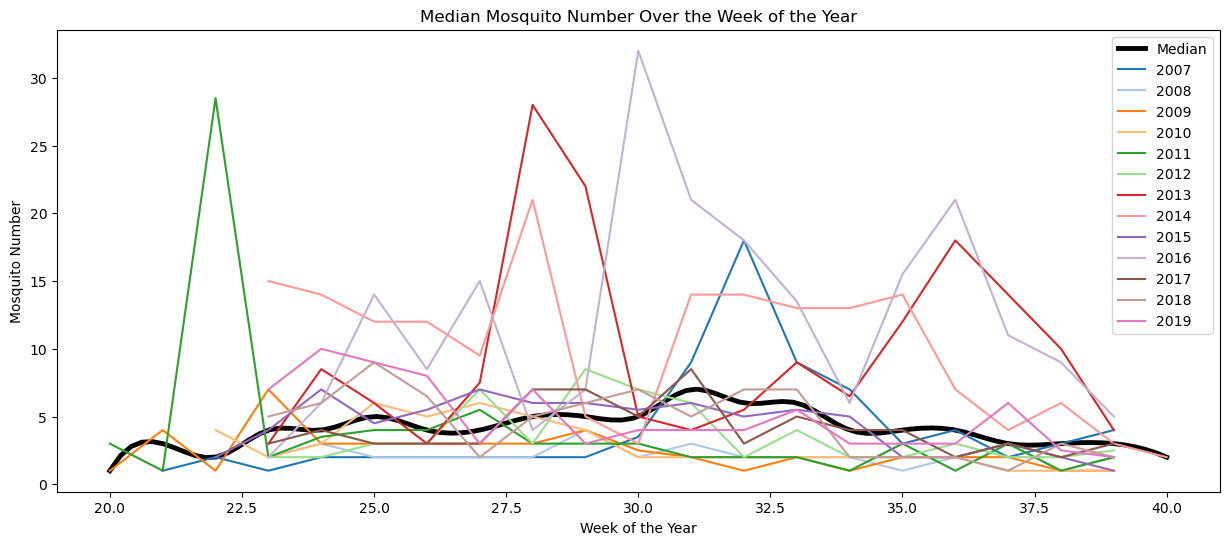

In [29]:
# Q3-3: 
from scipy.interpolate import make_interp_spline

# Set the figure size
plt.figure(figsize=(15, 6))

# Group the data by year and week of the year and calculate the median mosquito count for each week
weekly_median_mosquito = clean_data.groupby(['Year', 'Week'])['Mosquito number'].median().reset_index()

# Calculate the median mosquito number per week
median_mosquito = clean_data.groupby('Week')['Mosquito number'].median()
# Reset the index to convert the grouped data into a DataFrame
median_mosquito = median_mosquito.reset_index()
# Sort the data by week
median_mosquito = median_mosquito.sort_values('Week')

# Interpolate the median points for a smoother curve
x_new = np.linspace(median_mosquito['Week'].min(), median_mosquito['Week'].max(), 100)
spl = make_interp_spline(median_mosquito['Week'], median_mosquito['Mosquito number'])
y_smooth = spl(x_new)

# Plot the smoothed curve of the median mosquito number
plt.plot(x_new, y_smooth, color='black', linewidth=3.5, label='Median')

# Plotting the weekly median mosquito numbers for each year
sns.lineplot(x='Week', y='Mosquito number', hue='Year', data=weekly_median_mosquito, palette='tab20')

# Set the axis labels and title
plt.xlabel('Week of the Year')
plt.ylabel('Mosquito Number')
plt.title('Median Mosquito Number Over the Week of the Year')

# Show the legend
plt.legend()

# Show the plot
plt.show()


To analyze the median mosquito number caught in trap over the week of the year, we grouped the data by year and week of the year and calculated the median mosquito count for each week.

The resulting graph illustrates the median mosquito number over the week of the year, with the smoothed curve indicating the general trend, and the individual lines representing the median mosquito numbers for each year.

We observed that the maximum number varied across different years and occurred at slightly different times. However, the general trend suggests that the peak mosquito occurrence tends to fall between weeks 31 and 33 of the year.

This finding indicates a consistent pattern of higher mosquito populations during this period across multiple years. Identifying this temporal pattern can be valuable for understanding the seasonal dynamics of mosquito populations and planning appropriate mosquito control measures during the peak period of activity.





